In [2]:
# 1. Import Liabraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
# 2. Fake data
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)

In [4]:
# 3. Split into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 4. Scale Data
# Helps models learn better by standardizing the values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# 5. Creating 3 models
log_clf = LogisticRegression()
svc_clf = SVC(probability=True)
rf_clf = RandomForestClassifier()

In [7]:
# 6. Voting Classifier - teamwork model
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('svc', svc_clf), ('rf', rf_clf)],
    voting='soft'  # 'soft' = average the probabilities
)

In [ ]:
# 7. Create the Voting Model
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('svc', svc_clf), ('rf', rf_clf)],
    voting='soft'  # 'soft' = average the probabilities
)

In [ ]:
# 8. Train the voting model
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('svc', SVC(probability=True)),
                             ('rf', RandomForestClassifier())],
                 voting='soft')

In [12]:
# 9. Test the voting model
y_pred = voting_clf.predict(X_test)
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred))

Voting Classifier Accuracy: 0.91


In [13]:
# 10. Compare with individual model
# Let's see how each one performs alone
for clf in (log_clf, svc_clf, rf_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, "accuracy:", accuracy_score(y_test, y_pred))


LogisticRegression accuracy: 0.825
SVC accuracy: 0.91
RandomForestClassifier accuracy: 0.905
VotingClassifier accuracy: 0.905


In [14]:
# 11. Function to visualize
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(clf, X, y, title, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    X_grid = np.c_[xx.ravel(), yy.ravel()]
    Z = clf.predict(X_grid).reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Set1)
    ax.set_title(title)


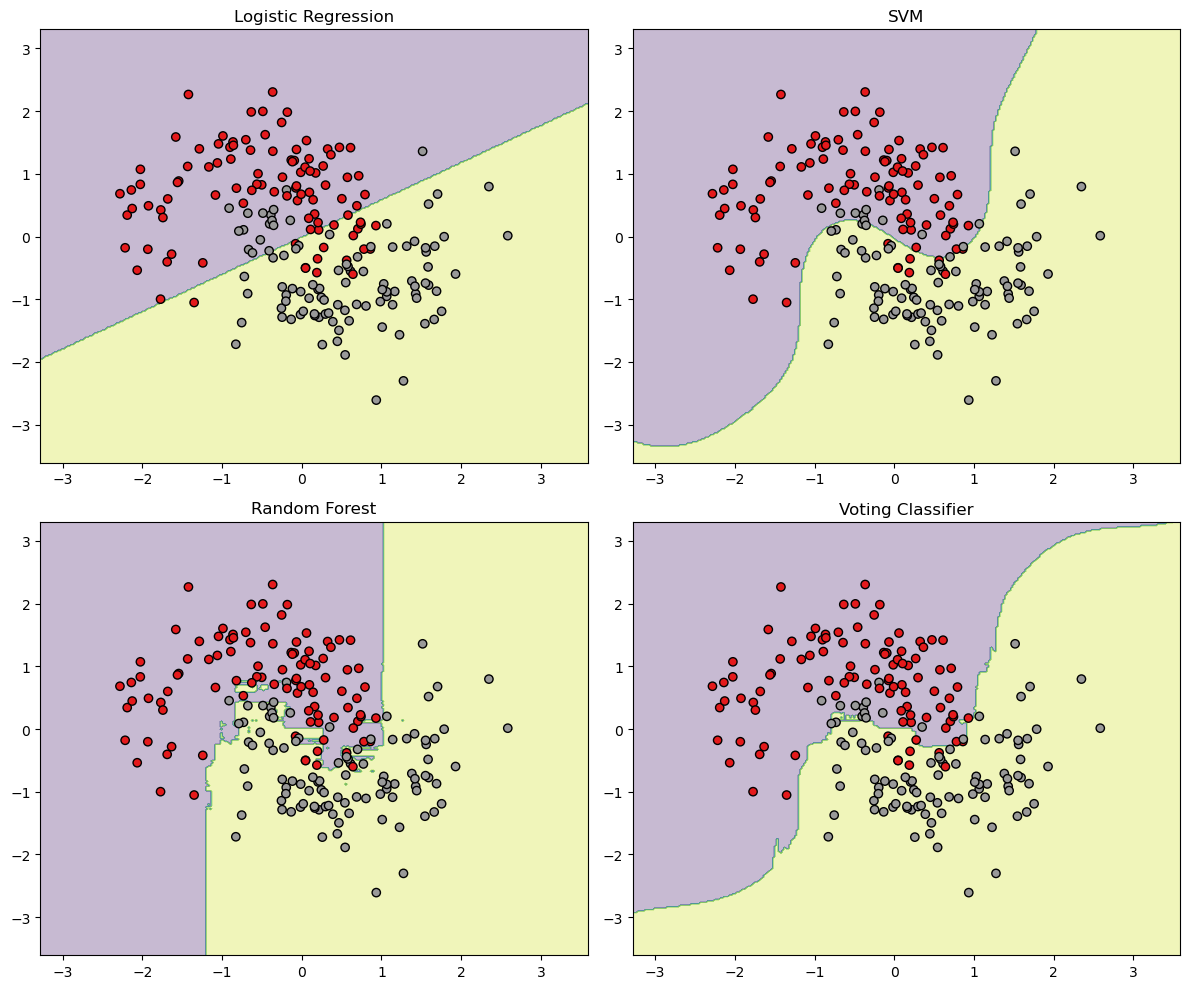

In [15]:
# 12. plot 4 models
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

models = [log_clf, svc_clf, rf_clf, voting_clf]
titles = ["Logistic Regression", "SVM", "Random Forest", "Voting Classifier"]

for model, title, ax in zip(models, titles, axs.ravel()):
    plot_decision_boundary(model, X_test, y_test, title, ax)

plt.tight_layout()
plt.show()
